Author: Shangyuan Liu

Username: acp21sl

UCard: 001768913

Module: COM6013 - Cybersecurity and Artificial Intelligence Dissertation Project

Project Name: Malicious Endpoint Detection and Response

Step 01: Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)

加载数据集

In [2]:
data_path = "../Dataset/IoT-DS2.csv"  # the original dataset
dataset = pd.read_csv(data_path)  # read the raw dataset into data-frame

df_raw = dataset.copy()
df_raw = df_raw.drop('Bwd_IAT_Mean.1', axis=1)  # remove the last column - all NAN

df_raw

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,6.464587e+09,3.232261e+09,64892.0,3.232261e+09,80.0,6.0,1.522984e+09,19377440.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,Anomaly,DDoS
1,6.464582e+09,3.232261e+09,59992.0,3.232261e+09,80.0,6.0,1.522984e+09,22110440.0,3.0,1.0,...,0.0,0.000000,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,Anomaly,DDoS
2,6.464567e+09,3.232261e+09,44446.0,3.232261e+09,80.0,17.0,1.522988e+09,2851022.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
3,6.464576e+09,3.232261e+09,53936.0,3.232261e+09,80.0,6.0,1.522992e+09,16638411.0,3.0,5.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
4,6.464578e+09,3.232261e+09,55650.0,3.232261e+09,80.0,6.0,1.522984e+09,24702225.0,6.0,4.0,...,146923.5,7354.617631,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,Anomaly,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,6.464475e+09,3.232236e+09,1500.0,3.232236e+09,1883.0,6.0,1.626325e+09,130.0,16.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438153,6.464475e+09,3.232236e+09,1487.0,3.232236e+09,1883.0,6.0,1.626325e+09,87.0,9.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438154,6.464476e+09,3.232236e+09,2009.0,3.232236e+09,1883.0,6.0,1.626325e+09,86.0,4.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438155,6.464476e+09,3.232236e+09,1970.0,3.232236e+09,1883.0,6.0,1.626325e+09,142.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,Anomaly,Flood


对Dataframe进行统计分析, 查看正常数据与异常数据的比例

统计攻击类型和对应的数量

In [3]:
print('The number of rows in raw dataset', df_raw.shape[0])  # rows  -- 1438157
print('The number of columns in raw dataset', df_raw.shape[1])  # columns  --  86

label_statistics = df_raw["Label"].value_counts()  # the statistics of Label features
cat_statistics = df_raw["Cat"].value_counts()  # the statistics of Cat features

print('\nThe statistics of Label feature \n', label_statistics)
print('\nThe statistics of Cat feature \n', cat_statistics)

The number of rows in raw dataset 1438157
The number of columns in raw dataset 85

The statistics of Label feature 
 Anomaly    1211706
Normal      226451
Name: Label, dtype: int64

The statistics of Cat feature 
 DDoS                 403711
Normal               226451
Okiru                153000
PortScan             153000
Reconnaissance       138283
Mirai                 92185
Sparta                82288
MQQT_bruteforce       50555
Torii                 24492
C&C                   23980
DoS                   20192
Attack                18884
Flood                 13780
HeartBeat             12889
MITM ARP Spoofing     10176
FileDownload           8034
Theft                  6257
Name: Cat, dtype: int64


清理无穷大和无穷小的值

In [4]:
df_delInf = df_raw.replace([np.inf, -np.inf], np.nan).dropna() # replace and delete all inf and -inf values to NaN
df_delInf   

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,6.464587e+09,3.232261e+09,64892.0,3.232261e+09,80.0,6.0,1.522984e+09,19377440.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,Anomaly,DDoS
1,6.464582e+09,3.232261e+09,59992.0,3.232261e+09,80.0,6.0,1.522984e+09,22110440.0,3.0,1.0,...,0.0,0.000000,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,Anomaly,DDoS
2,6.464567e+09,3.232261e+09,44446.0,3.232261e+09,80.0,17.0,1.522988e+09,2851022.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
3,6.464576e+09,3.232261e+09,53936.0,3.232261e+09,80.0,6.0,1.522992e+09,16638411.0,3.0,5.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
4,6.464578e+09,3.232261e+09,55650.0,3.232261e+09,80.0,6.0,1.522984e+09,24702225.0,6.0,4.0,...,146923.5,7354.617631,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,Anomaly,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,6.464475e+09,3.232236e+09,1500.0,3.232236e+09,1883.0,6.0,1.626325e+09,130.0,16.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438153,6.464475e+09,3.232236e+09,1487.0,3.232236e+09,1883.0,6.0,1.626325e+09,87.0,9.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438154,6.464476e+09,3.232236e+09,2009.0,3.232236e+09,1883.0,6.0,1.626325e+09,86.0,4.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438155,6.464476e+09,3.232236e+09,1970.0,3.232236e+09,1883.0,6.0,1.626325e+09,142.0,2.0,1.0,...,0.0,0.000000,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,Anomaly,Flood


In [5]:
df_repZero = df_delInf.replace(0, np.nan)   # replace all 0 values to NaN

def missing_rate(df):
    """
    calculate the rate of missing values (NaN) in each feature
    Args:
        df (_data-frame_): df_raw
    Returns:
        _float_: percentage of missing values in each feature data
    """
    # statistics on the number and percentage of missing values
    nan_percent = (df.isnull().sum() / len(df)) * 100
    # Get the percentage of missing values in each column, sorted in ascending order
    # >0 is to screen out columns without missing values and return only those with missing values
    nan_percent = nan_percent[nan_percent > 0].sort_values()
    return nan_percent

missingVal_feature = missing_rate(df_repZero)

# print the rate of NaN value
print("The percentage of each feature's missing value\n", missingVal_feature)

The percentage of each feature's missing value
 Dst_Port               0.179745
Protocol               0.179745
Src_Port               0.180301
Flow_IAT_Min           0.764385
Init_Fwd_Win_Byts      0.889893
                        ...    
Fwd_Blk_Rate_Avg     100.000000
Fwd_Byts/b_Avg       100.000000
Bwd_Byts/b_Avg       100.000000
Fwd_Pkts/b_Avg       100.000000
Fwd_URG_Flags        100.000000
Length: 75, dtype: float64


Set a threshold value to remove any features with a percentage of missing value above the threshold

In [6]:
threshold = 90 
# the percentage of missing value over 90%
missingVal_90 = missingVal_feature[missingVal_feature > threshold]

# set a list to store any features should be removed
delete_list = missingVal_90.index.tolist()

# features in delete_list are deleted to create a new data-frame
df_delMissVal = df_delInf.drop(delete_list, axis=1)

df_delMissVal

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,6.464587e+09,3.232261e+09,64892.0,3.232261e+09,80.0,6.0,1.522984e+09,19377440.0,2.0,1.0,...,0.0,0.0,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,Anomaly,DDoS
1,6.464582e+09,3.232261e+09,59992.0,3.232261e+09,80.0,6.0,1.522984e+09,22110440.0,3.0,1.0,...,0.0,0.0,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,Anomaly,DDoS
2,6.464567e+09,3.232261e+09,44446.0,3.232261e+09,80.0,17.0,1.522988e+09,2851022.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
3,6.464576e+09,3.232261e+09,53936.0,3.232261e+09,80.0,6.0,1.522992e+09,16638411.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Anomaly,DDoS
4,6.464578e+09,3.232261e+09,55650.0,3.232261e+09,80.0,6.0,1.522984e+09,24702225.0,6.0,4.0,...,0.0,146923.5,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,Anomaly,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,6.464475e+09,3.232236e+09,1500.0,3.232236e+09,1883.0,6.0,1.626325e+09,130.0,16.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438153,6.464475e+09,3.232236e+09,1487.0,3.232236e+09,1883.0,6.0,1.626325e+09,87.0,9.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438154,6.464476e+09,3.232236e+09,2009.0,3.232236e+09,1883.0,6.0,1.626325e+09,86.0,4.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,Anomaly,Flood
1438155,6.464476e+09,3.232236e+09,1970.0,3.232236e+09,1883.0,6.0,1.626325e+09,142.0,2.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,Anomaly,Flood


Remove all meaningless features

In [ ]:
# # remove all meaningless features
# df_dropFeats = df_delMissVal.drop(["Flow_ID", "Src_IP", "Src_Port", "Dst_IP", "Dst_Port", "Protocol", "Timestamp"], axis=1)
# df_dropFeats

数据可视化

In [14]:
df_delMissVal['Label'].value_counts()

Anomaly    1211699
Normal      226451
Name: Label, dtype: int64

In [15]:
df_delMissVal['Label'].value_counts().index.to_list()

['Anomaly', 'Normal']

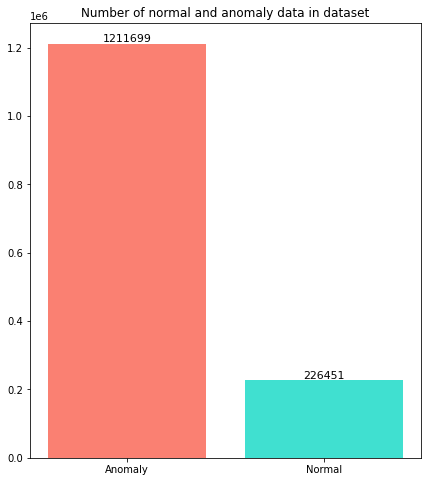

In [16]:
plt.figure(figsize=(7, 8)) 

labels = df_delMissVal['Label'].value_counts().index.to_list()
data = df_delMissVal['Label'].value_counts().to_list()
plt.bar(labels, data, color=['salmon','turquoise'])
plt.title('Number of normal and anomaly data in dataset')

for a, b in zip(labels, data):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', font='TIMES NEW ROME', fontsize=11)

# Solve the problem of unclear and incomplete pictures
plt.savefig("../images/labels_batChart.png", dpi=500, bbox_inches='tight')
plt.show()

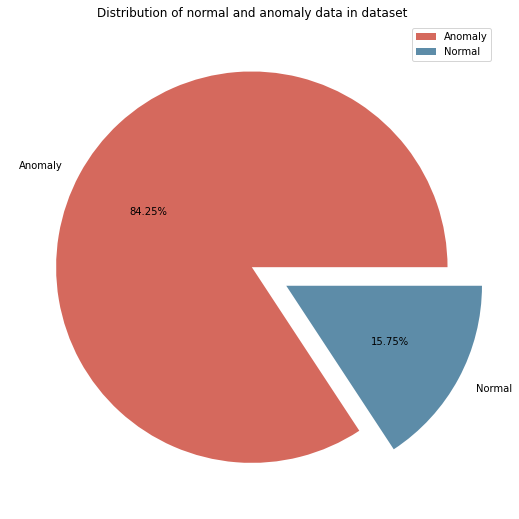

In [17]:
plt.figure(figsize=(9, 9))  # adjusting the size of graphics

data = df_delMissVal['Label'].value_counts()  # the number of each label

plt.pie(data,
        labels=df_delMissVal['Label'].value_counts().index, # set pie chart labels
        colors=["#d5695d", "#5d8ca8"], # set colours
        explode=(0, 0.2),  # 
        autopct='%.2f%%',  # formatted output percentages
       )
plt.title("Distribution of normal and anomaly data in dataset")
plt.legend()

# Solve the problem of unclear and incomplete pictures
plt.savefig("../images/labels_pieChart.png",dpi=500, bbox_inches = 'tight') 
plt.show()

In [18]:
df_delMissVal['Cat'].value_counts()

DDoS                 403711
Normal               226451
Okiru                153000
PortScan             153000
Reconnaissance       138283
Mirai                 92178
Sparta                82288
MQQT_bruteforce       50555
Torii                 24492
C&C                   23980
DoS                   20192
Attack                18884
Flood                 13780
HeartBeat             12889
MITM ARP Spoofing     10176
FileDownload           8034
Theft                  6257
Name: Cat, dtype: int64

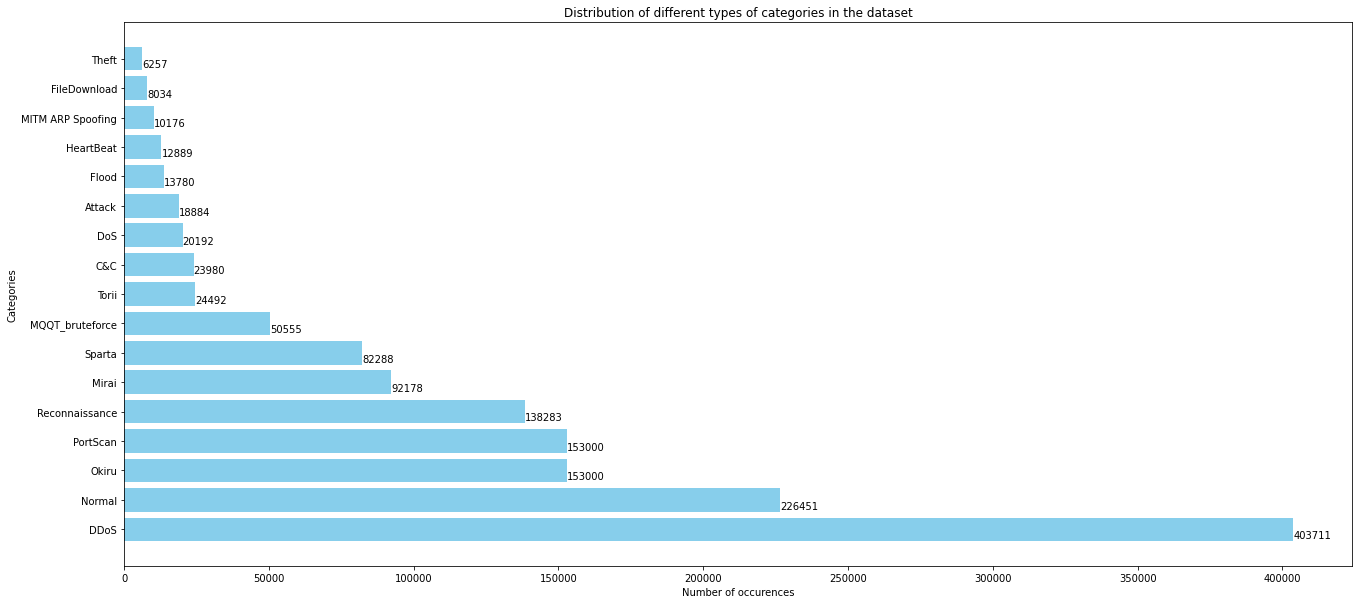

In [19]:
plt.figure(figsize=(22, 10))

categories = df_delMissVal['Cat'].value_counts().index
y_pos = np.arange(len(categories)) 
amount = df_delMissVal['Cat'].value_counts()
plt.barh(y_pos, amount, align='center', color='skyblue')
plt.yticks(y_pos, categories)
plt.title('Distribution of different types of categories in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Categories')
for i, v in enumerate(amount):
    plt.text(v + 5, i - 0.3 , str(v))

# Solve the problem of unclear and incomplete pictures
plt.savefig("../images/cat_barChart.png", dpi=500, bbox_inches = 'tight')  
plt.show()

映射 特征转换

In [20]:
# converting text data to numeric type data
df_convert = df_delMissVal.replace(['Normal', 'Anomaly'], [0, 1]).replace(
    ['Normal', 'DDoS', 'PortScan', 'Okiru', 'Reconnaissance', 'Mirai', 'Sparta', 'MQQT_bruteforce', 'Torii', 'C&C', 'DoS', 'Attack', 'Flood', 'HeartBeat', 'MITM ARP Spoofing', 'FileDownload', 'Theft'], 
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

df_convert

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,6.464587e+09,3.232261e+09,64892.0,3.232261e+09,80.0,6.0,1.522984e+09,19377440.0,2.0,1.0,...,0.0,0.0,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,1,1
1,6.464582e+09,3.232261e+09,59992.0,3.232261e+09,80.0,6.0,1.522984e+09,22110440.0,3.0,1.0,...,0.0,0.0,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,1,1
2,6.464567e+09,3.232261e+09,44446.0,3.232261e+09,80.0,17.0,1.522988e+09,2851022.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1
3,6.464576e+09,3.232261e+09,53936.0,3.232261e+09,80.0,6.0,1.522992e+09,16638411.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1
4,6.464578e+09,3.232261e+09,55650.0,3.232261e+09,80.0,6.0,1.522984e+09,24702225.0,6.0,4.0,...,0.0,146923.5,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,6.464475e+09,3.232236e+09,1500.0,3.232236e+09,1883.0,6.0,1.626325e+09,130.0,16.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,1,12
1438153,6.464475e+09,3.232236e+09,1487.0,3.232236e+09,1883.0,6.0,1.626325e+09,87.0,9.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,1,12
1438154,6.464476e+09,3.232236e+09,2009.0,3.232236e+09,1883.0,6.0,1.626325e+09,86.0,4.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,1,12
1438155,6.464476e+09,3.232236e+09,1970.0,3.232236e+09,1883.0,6.0,1.626325e+09,142.0,2.0,1.0,...,20.0,0.0,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,1,12


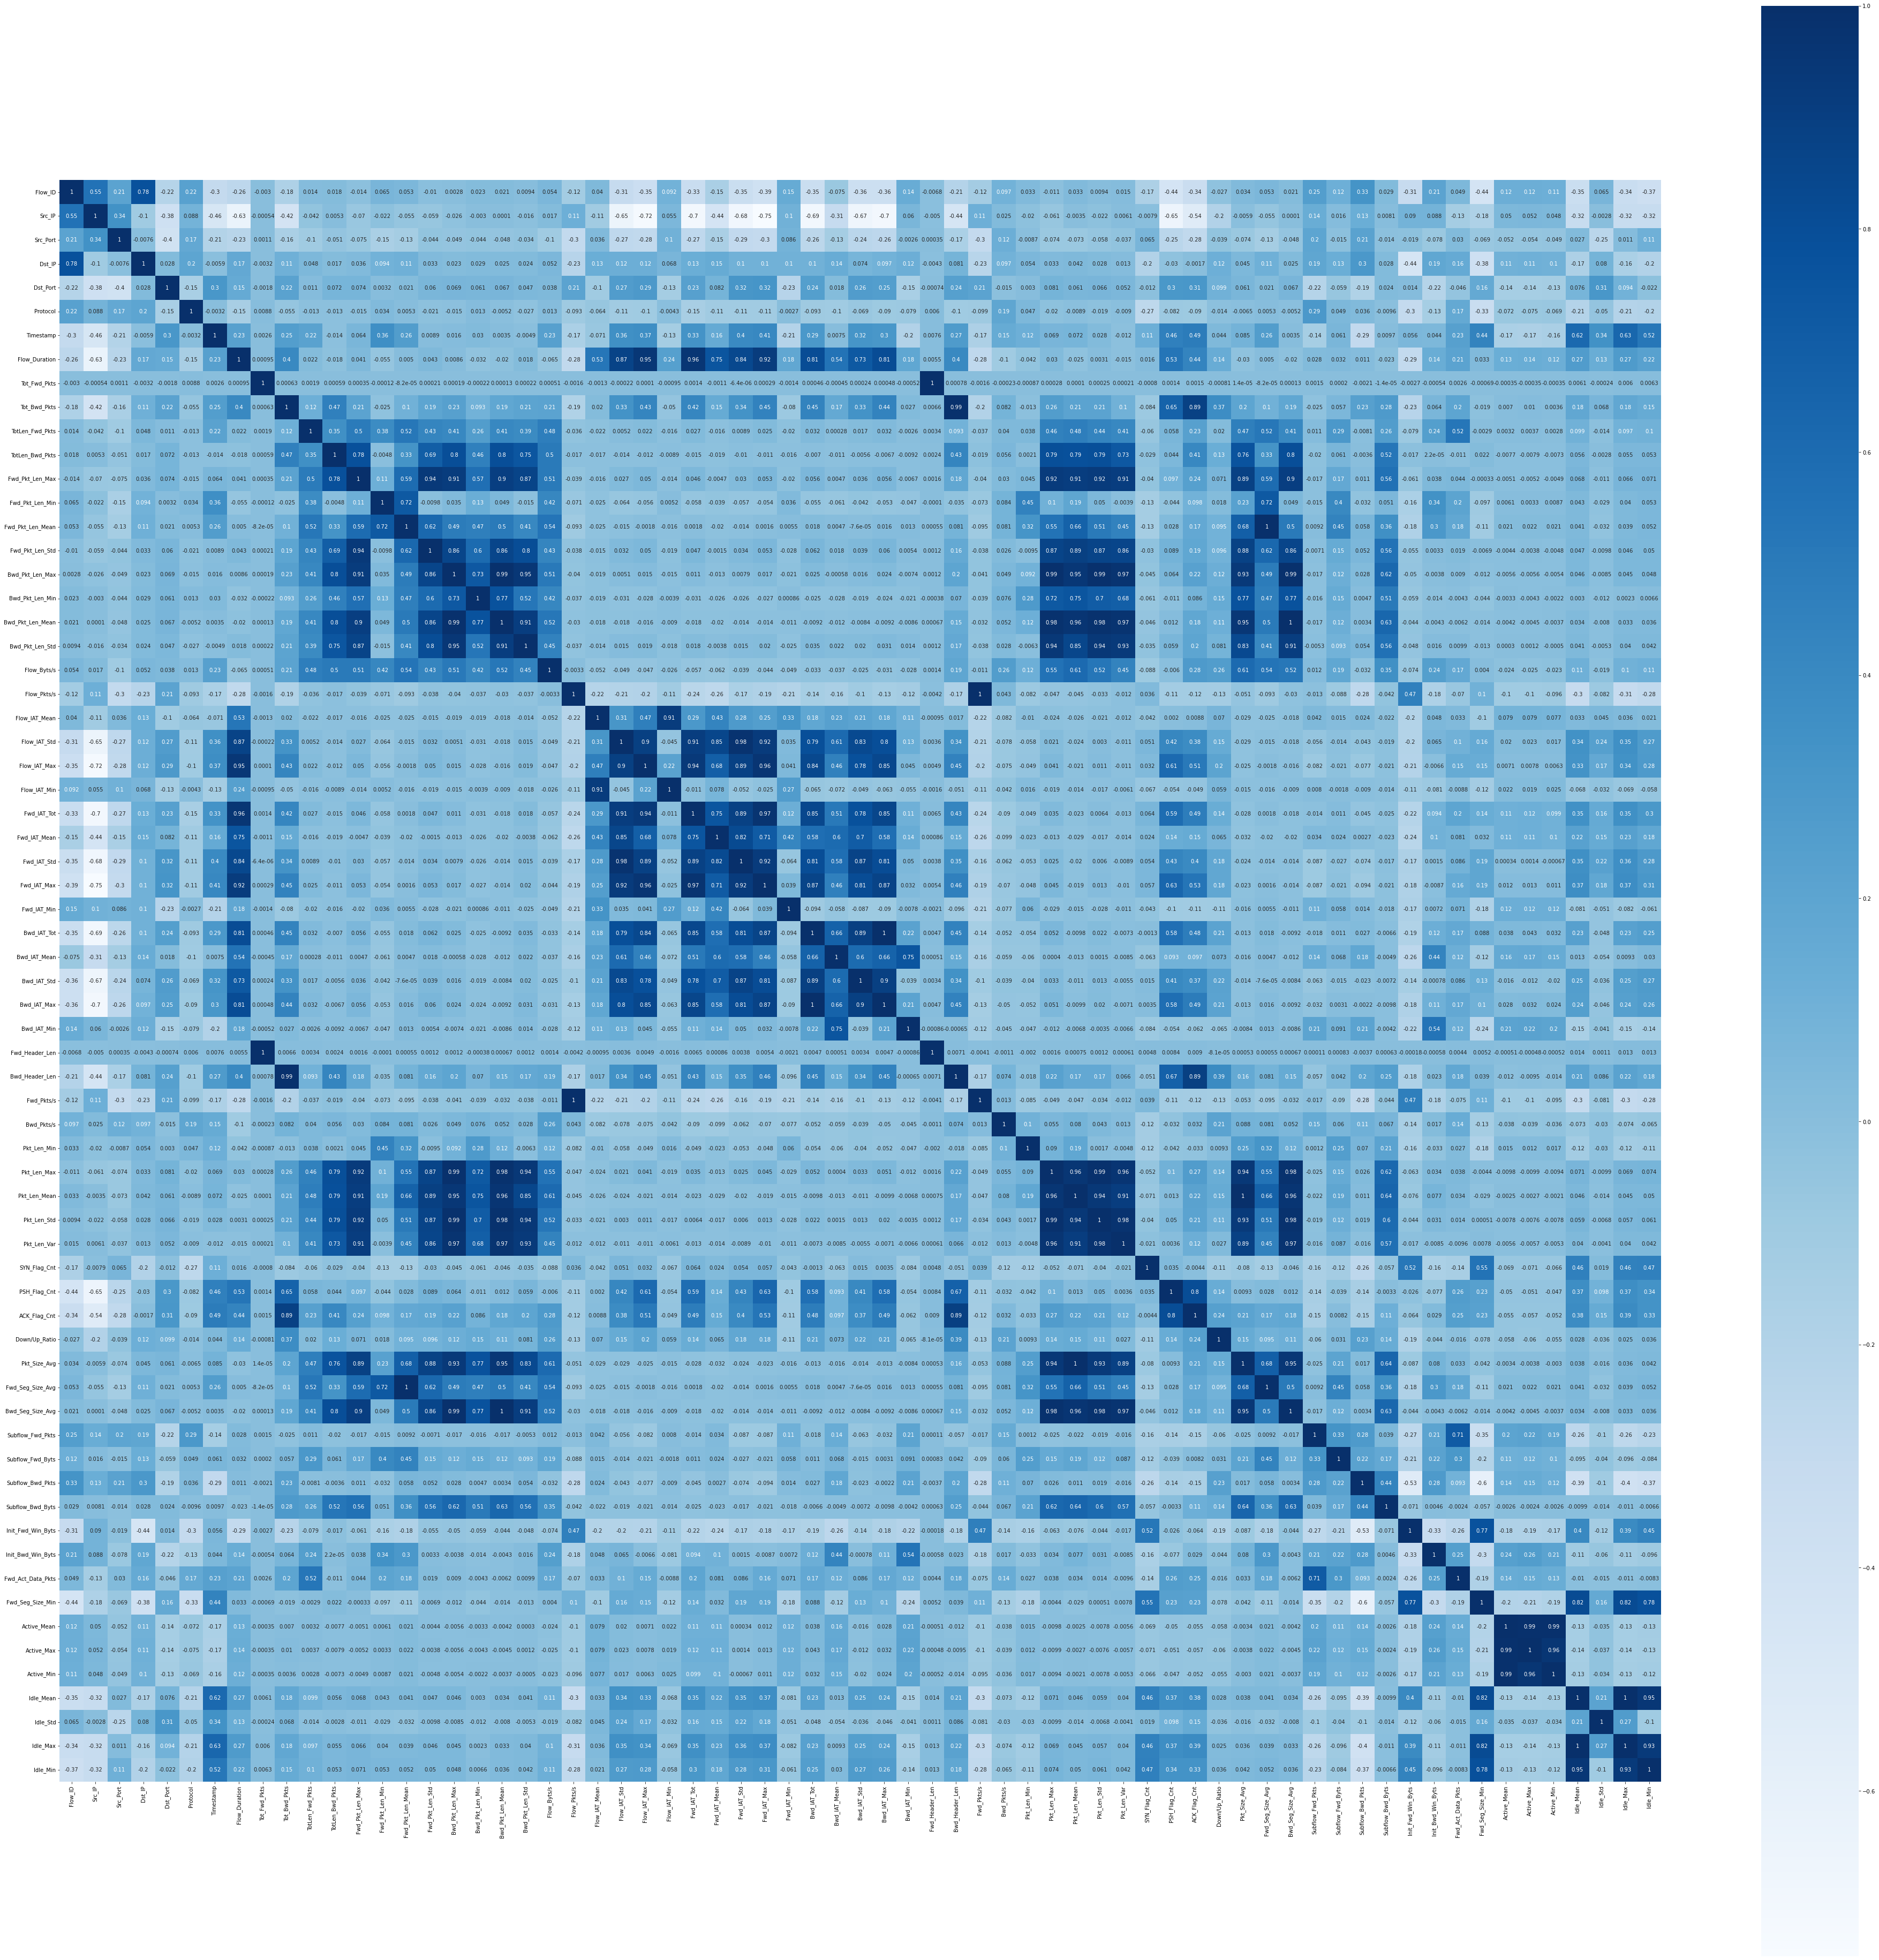

In [21]:
# 计算相关系数 Pearson correlation coefficient - PCC 
# 相关系数可视化 - 热力图 heatmap
# get all features data-frame
df_feature = df_convert.iloc[:, : -2]
df_pcc = df_feature.corr('pearson')  # calculate pearson correlation coefficient

plt.subplots(figsize=(len(df_pcc), len(df_pcc)))
sns.heatmap(df_pcc, annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig("../images/feature_pcc.png",dpi=500,bbox_inches = 'tight')  # Solve the problem of unclear and incomplete pictures
plt.show()


Save the dataframe as a .csv file

In [ ]:
df_convert.to_csv("../Dataset/dataset_cleaned.csv", index = False)